In [228]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib_venn import venn2, venn3, venn2_circles
import seaborn as sns
import sys
import importlib

sys.path.append('/mnt/c/Users/akpau/Notebooks/')
import plot_curves as pc

pd.set_option('display.max_columns',(90))
pd.set_option('display.max_rows',(24))

%config Completer.use_jedi=False

In [229]:
curve1=pd.read_csv('/mnt/c/Users/akpau/box_drive/TCPL_Database/Step_5_tcpl_processed/AKP_Giacomini_Txptr_curve_fit_phase123.csv')
curve2=pd.read_csv('/mnt/c/Users/akpau/box_drive/TCPL_Database/Step_5_tcpl_processed/AKP_Giacomini_Txptr_curve_fit_validation.csv')
curve=pd.concat([curve1,curve2]).reset_index(drop=True)
curve.head(2)

,m5id,flag,spid,chid,casn,chnm,dsstox_substance_id,code,aeid,aenm,m4id,bmad,resp_max,resp_min,max_mean,max_mean_conc,max_med,max_med_conc,logc_max,logc_min,cnst,hill,hcov,gnls,gcov,cnst_er,cnst_aic,cnst_rmse,cnst_prob,hill_tp,hill_tp_sd,hill_ga,hill_ga_sd,hill_gw,hill_gw_sd,hill_er,hill_er_sd,hill_aic,hill_rmse,hill_prob,gnls_tp,gnls_tp_sd,gnls_ga,gnls_ga_sd,gnls_gw,gnls_gw_sd,gnls_la,gnls_la_sd,gnls_lw,gnls_lw_sd,gnls_er,gnls_er_sd,gnls_aic,gnls_rmse,gnls_prob,nconc,npts,nrep,nmed_gtbl,hitc,modl,fitc,coff,actp,modl_er,modl_tp,modl_ga,modl_gw,modl_la,modl_lw,modl_rmse,modl_prob,modl_acc,modl_acb,modl_ac10,resp_unit,conc_unit,AC50_uM,pAC50
0,7047,NaN,100,98,000098_1,000098_1,NOTOX_98,C0000981,1,MRP3_Txptr_Inhib_3H17bE_uptake,7047,47.394023,32.997118,-51.729107,17.578105,1.0,17.578105,0.0,2.0,0.0,1.0,0.0,NaN,0.0,NaN,3.064196,58.621739,26.642651,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,6,2,0,0,cnst,7,50,0.0,3.064196,NaN,NaN,NaN,NaN,NaN,26.642651,1.0,NaN,NaN,NaN,percent_activity,NaN,NaN,NaN
1,7048,NaN,101,99,9864311,schembl5315322,NOTOX_99,C9864311,1,MRP3_Txptr_Inhib_3H17bE_uptake,7048,47.394023,-10.568182,-61.815562,-12.272564,2.0,-12.272564,1.0,2.0,0.0,1.0,0.0,NaN,0.0,NaN,3.628519,64.468884,40.521596,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,6,2,0,0,cnst,7,50,0.0,3.628519,NaN,NaN,NaN,NaN,NaN,40.521596,1.0,NaN,NaN,NaN,percent_activity,NaN,NaN,NaN


In [230]:
curve=curve[['m5id', 'flag', 'spid', 'chid', 'casn', 'aenm', 'm4id', 'bmad', 'resp_max', 'resp_min',
       'max_mean', 'max_mean_conc', 'max_med', 'max_med_conc', 'logc_max',
       'logc_min', 'nconc', 'npts', 'nrep', 'nmed_gtbl', 'hitc', 'modl', 'fitc', 'coff', 'actp', 'modl_er',
       'modl_tp', 'modl_ga', 'modl_gw', 'modl_la', 'modl_lw', 'modl_rmse',
       'modl_prob', 'modl_acc', 'modl_acb', 'modl_ac10', 'resp_unit',
       'conc_unit', 'AC50_uM', 'pAC50']]
curve.columns=['m5id', 'flag', 'Compound', 'chid', 'casn', 'aenm', 'm4id', 'bmad', 'resp_max', 'resp_min',
       'max_mean', 'max_mean_conc', 'max_med', 'max_med_conc', 'logc_max',
       'logc_min', 'nconc', 'npts', 'nrep', 'nmed_gtbl', 'hitc', 'modl', 'fitc', 'coff', 'actp', 'modl_er',
       'top', 'IC50', 'hill', 'modl_la', 'modl_lw', 'RMSE',
       'modl_prob', 'modl_acc', 'modl_acb', 'modl_ac10', 'resp_unit',
       'conc_unit', 'AC50_uM', 'pIC50']
curve['bottom']=0

In [231]:
curve['notes']=['TCPL fit succeeded' if x==1 else np.nan for x in curve.hitc]

In [232]:
curve['Target']=curve.aenm.str[0:4]
curve.Target.unique()

array(['MRP3', 'MRP4', 'BSEP', 'NTCP'], dtype=object)

In [233]:
chems=pd.read_excel("/mnt/c/Users/akpau/box_drive/TCPL_Database/Step_1_raw_input_files/Chemicals/MASTER_TCPL_COMPOUND_LIST_20210514.xlsx", engine='openpyxl')
chems.head(2)

,spid,chid,chnm,casn,dsstox_substance_id,alt_name_1,alt_name_2,alt_name_3,CASRN_ID,CASRN_alt,ATOM_LOT,ATOM_ID_GSK,compound_id,names_new,pcid_from_name,smiles,smiles_pcid,Unnamed: 17,pubchem_smiles,source,Morgan,SMDC,Proprietary,MRP3_comb,APR_toxcast_MMP,SMDC_new,Chembl_txp_all,Hafey
0,1,1,vofopitant,6918331,NOTOX_1,NaN,NaN,NaN,168266-90-8,NaN,1.0,ATOM000270,ATOM000001_1,NaN,NaN,COc1ccc(cc1CN[C@H]1CCCN[C@H]1c1ccccc1)-n1nnnc1...,COC1=C(C=C(C=C1)N2C(=NN=N2)C(F)(F)F)CN[C@H]3CC...,6918331.0,COC1=C(C=C(C=C1)N2C(=NN=N2)C(F)(F)F)CN[C@H]3CC...,SA200,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,19,1,vofopitant,6918331,NOTOX_1,NaN,NaN,NaN,168266-90-8,NaN,2.0,ATOM000270,ATOM000001_2,NaN,NaN,COc1ccc(cc1CN[C@H]1CCCN[C@H]1c1ccccc1)-n1nnnc1...,COC1=C(C=C(C=C1)N2C(=NN=N2)C(F)(F)F)CN[C@H]3CC...,6918331.0,COC1=C(C=C(C=C1)N2C(=NN=N2)C(F)(F)F)CN[C@H]3CC...,SA200,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [259]:
targs=['BSEP','MRP3','MRP4','NTCP']
raw = pd.read_csv('/mnt/c/Users/akpau/box_drive/TCPL_Database/Step_5_tcpl_processed/mc3_all_otpt.csv', index_col=0)

raw.columns=['Compound', 'chid', 'casn', 'chnm', 'dsstox_substance_id', 'code', 'aeid',
       'Target', 'm0id', 'm1id', 'm2id', 'm3id', 'logc', 'percent_inhibition', 'cndx', 'Well_Type',
       'Plate', 'rowi', 'coli', 'repi', 'resp_unit', 'conc_unit']
raw['Conc_uM']=10**raw.logc
raw['logconc']=np.log10(raw.Conc_uM/1000000)
raw.Well_Type=raw.Well_Type.str.replace('n','negativeControl')
raw.head(2)

raw=raw[raw.Target.isin(targs)]

nconcdict={}
for plate in raw.Plate.unique():
    nconcdict[plate]=raw[raw.Plate==plate].cndx.max()
raw['nconc']=raw.Plate.map(nconcdict)
nplatedict={}
for compound in raw.Compound.unique():
    nplatedict[compound]=raw[raw.Compound==compound].Plate.nunique()
raw['nplate']=raw.Compound.map(nplatedict)

for targ in targs:
    for compound in raw.Compound.unique():
        if compound in [207,210]:
            continue
    # print(compound, raw[raw.Compound==compound].nconc.unique().tolist())
        if (raw[(raw.Compound==compound)&(raw.Target==targ)].nconc.unique().tolist()==[3,9]):
            raw=raw.drop(raw[(raw.Compound==compound)&(raw.Target==targ)&(raw.nconc==3)].index)

/home/apaulson/miniconda3/envs/new-pandas/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
importlib.reload(pc)

<module 'plot_curves' from '/mnt/c/Users/akpau/Notebooks/plot_curves.py'>

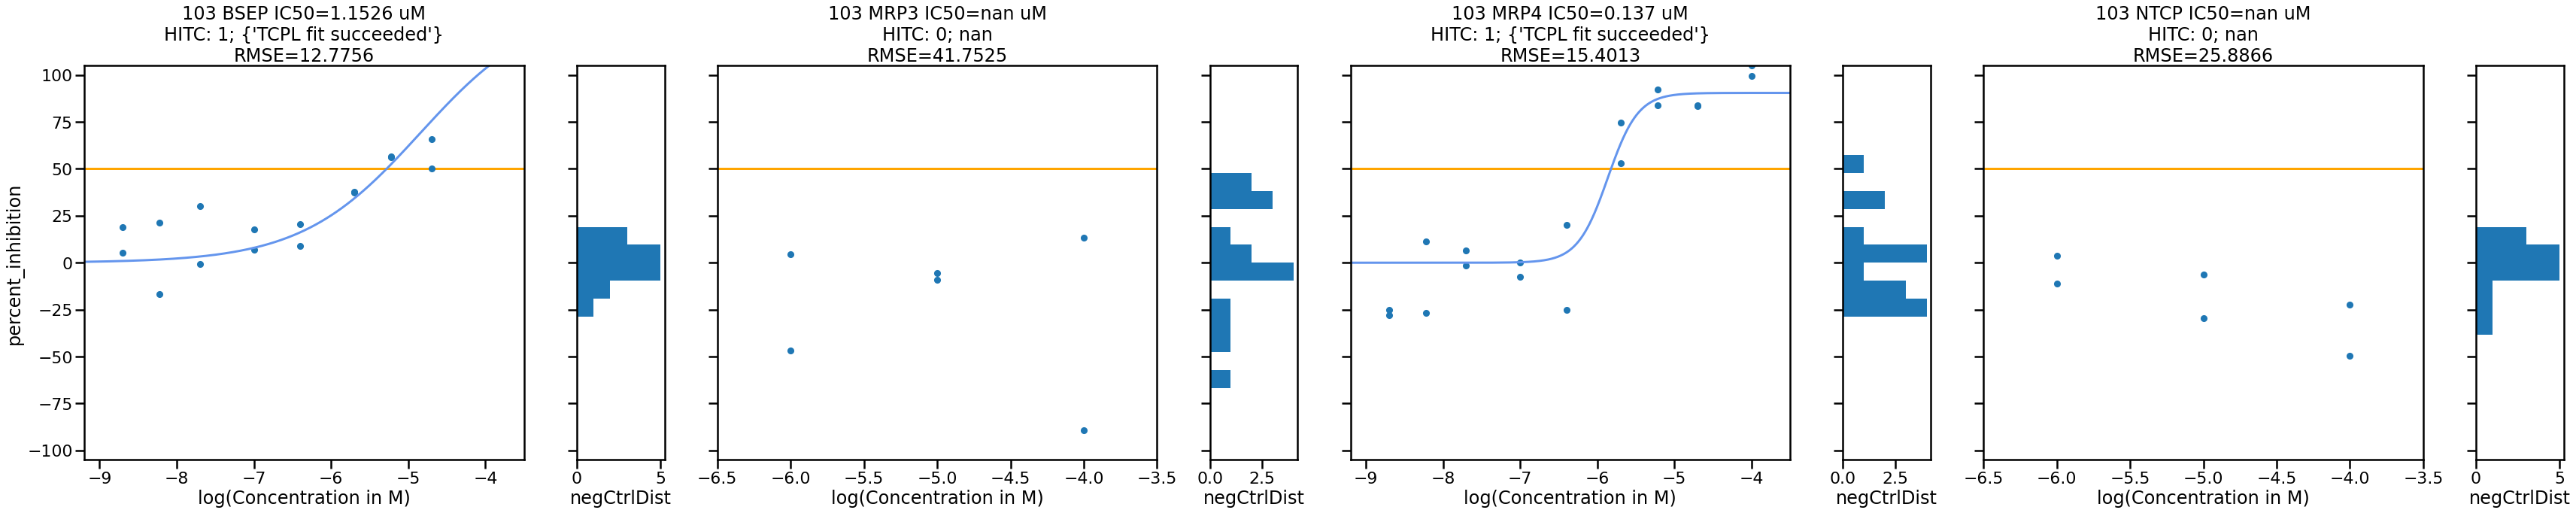

In [263]:
pc.plot_pct_inhib_curves(compound=103, curve=curve, raw=raw, graphcol='percent_inhibition', targs=['BSEP', 'MRP3', 'MRP4', 'NTCP'], save_fig=False)

In [265]:
m4hits=curve[(curve.hitc==1)&(curve.Target=='MRP4')&(~curve.casn.astype(str).str.contains('_'))]
m4hits=m4hits.sort_values('m4id')
m4hits=m4hits.sort_values('Compound')
m4hits=m4hits[m4hits.nconc!=11]
m4hits=m4hits.drop_duplicates(subset='Compound', keep='last')

In [266]:
m4hits.Compound.nunique()

60

In [267]:
importlib.reload(pc)
for compound in m4hits.Compound.unique():
    pc.plot_pct_inhib_curves(compound=compound, curve=m4hits, raw=raw, graphcol='percent_inhibition', targs=['MRP4'], save_fig=True, save_lab='TCPL')

In [268]:
m4chems = chems[chems.spid.isin(m4hits.Compound.unique())]
m4chems.columns=['Compound', 'chid', 'Name', 'Pubchem_CID', 'dsstox_substance_id', 'alt_name_1',
       'alt_name_2', 'alt_name_3', 'CASRN_ID', 'CASRN_alt', 'ATOM_LOT',
       'ATOM_ID_GSK', 'compound_id', 'names_new', 'pcid_from_name', 'smiles',
       'smiles_pcid', 'Unnamed: 17', 'pubchem_smiles', 'source', 'Morgan',
       'SMDC', 'Proprietary', 'MRP3_comb', 'APR_toxcast_MMP', 'SMDC_new',
       'Chembl_txp_all', 'Hafey']
m4chems=m4chems[['Compound', 'Name', 'Pubchem_CID', 'smiles', 'source']]

In [277]:
m4chems=m4chems.merge(m4hits[['Target', 'Compound', 'nconc', 'npts', 'nrep', 'AC50_uM', 'pIC50','notes', 'flag',]], how='left', )

In [280]:
m4chems.columns=['Compound', 'Name', 'Pubchem_CID', 'smiles', 'source', 'Target',
       'nconc', 'npts', 'nrep', 'IC50_uM', 'pIC50', 'notes', 'flag']

In [282]:
m4chems.to_csv('MRP4_hits_info.csv', index=False)